<a href="https://colab.research.google.com/github/ikonushok/My_studying_Data-Science-and-Neyro-Nets-on-Python/blob/master/%D0%94%D0%97_5_Ultra_%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%82%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D1%81%D0%BE%D0%BE%D0%B1%D1%89%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Хочу замерить скорость выполнения скрипта
from datetime import datetime
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Чтение файлов
import os
os.chdir('/content/drive/My Drive/Занятие_5_RNN+CNN для текстов/data/twitter')
os.listdir()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


['negative.xlsx',
 'positive.xlsx',
 'train_positives.txt',
 'test_positives.txt',
 'train_negatives.txt',
 'test_negatives.txt']

# Формирование *.txt файлов из столбцов *.xlsx

In [3]:
# загружаем файлы
xl_neg = pd.ExcelFile('negative.xlsx')
xl_pos = pd.ExcelFile('positive.xlsx')

In [11]:
df_negatives = xl_neg.parse() # загружаем данные в DataFrame
print(df_negatives.head())
print()
print(df_negatives.index)
print('Число строк включая названия = ', len(df_negatives.index))
print()
print(df_negatives['twitt'].head())
print()
print(df_negatives.twitt[0])

# Формируем файлы: train, test negatives

a = int(len(df_negatives.index)*0.8)
train_neg = df_negatives.twitt[:a]
test_neg = df_negatives.twitt[a:]

# записываю нужный столбец в txt
df = pd.DataFrame(train_neg, columns = ['twitt'])
df.to_csv('train_negatives.txt', index = False, sep=',')
df = pd.DataFrame(test_neg, columns = ['twitt'])
df.to_csv('test_negatives.txt', index = False, sep=',')

print(len(train_neg.index)+len(test_neg.index))

                    1           2           nik  ...    8    9  10
0  408906818262687744  1386325957  nugemycejela  ...   42   39   0
1  408906858515398656  1386325966       4post21  ...   49  249   0
2  408906914437685248  1386325980      Poliwake  ...  207  200   0
3  408906914723295232  1386325980    capyvixowe  ...   17   34   0
4  408906915704737792  1386325980   nunejibaduq  ...   62   62   0

[5 rows x 12 columns]

RangeIndex(start=0, stop=111922, step=1)
Число строк включая названия =  111922

0    Коллеги сидят рубятся в Urban terror, а я из-з...
1    @elina_4post как говорят обещаного три года жд...
2    Желаю хорошего полёта и удачной посадки,я буду...
3    Обновил за каким-то лешим surf, теперь не рабо...
4    Котёнка вчера носик разбила, плакала и расстра...
Name: twitt, dtype: object

Коллеги сидят рубятся в Urban terror, а я из-за долбанной винды не могу :(


In [8]:
df_positives = xl_pos.parse() # загружаем данные в DataFrame
print(df_positives.head())
print()
print(df_positives.index)
print('Число строк включая названия = ', len(df_positives.index))
print()
print(df_positives['twitt'].head())
print()
print(df_positives.twitt[0])

# Формируем файлы: train, test positives

a = int(len(df_positives.index)*0.8)
train_pos = df_positives.twitt[:a]
test_pos = df_positives.twitt[a:]

# записываю нужный столбец в txt
df = pd.DataFrame(train_pos, columns = ['twitt'])
df.to_csv('train_positives.txt', index = False, sep=',')
df = pd.DataFrame(test_pos, columns = ['twitt'])
df.to_csv('test_positives.txt', index = False, sep=',')

print(len(train_pos.index)+len(test_pos.index))

                    1           2              nik  ...   8   9  10
0  408906692693221377  1386325927  alinakirpicheva  ...  59  31   2
1  408906695083954177  1386325927        EvgeshaRe  ...  26  27   0
2  408906695356973056  1386325927    ikonnikova_21  ...  19  17   0
3  408906761416867842  1386325943        JumpyAlex  ...  16  23   1
4  408906761769598976  1386325943  JustinB94262583  ...   6  16   0

[5 rows x 12 columns]

RangeIndex(start=0, stop=114910, step=1)
Число строк включая названия =  114910

0    Да, все-таки он немного похож на него. Но мой ...
1    RT @KatiaCheh: Ну ты идиотка) я испугалась за ...
2    RT @digger2912: "Кто то в углу сидит и погибае...
3    @irina_dyshkant Вот что значит страшилка :D\nН...
4    ну любишь или нет? — Я не знаю кто ты бля:D ht...
Name: twitt, dtype: object

Да, все-таки он немного похож на него. Но мой мальчик все равно лучше:D


In [26]:
# Удаление стоп-слов - сделать, если не хватит точности
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
_stopWords = stopwords.words('russian')
print(_stopWords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'на

# Подготовка данных

In [3]:
# функция чтения текстов
def readText(fileName):
  f = open(fileName, 'r') # открыли файл
  text = f.read() # считали файл
  text = text.replace("\n", " ")  # заменили переносы строк на пробелы

  return text

# Интересующие нас авторы
className = ['positives', 'negatives'] 
nClasses = len(className) # посчитали количество авторов (число классов)

# загружаем тексы в базы
trainText = []
testText = []

for i in className:
  for j in os.listdir():
    if i in j:
      if 'train' in j:
        trainText.append(readText(j))
        print('train: ', j)
      if 'test' in j:
        testText.append(readText(j))
        print('Test: ', j)

print('\nЭлементов в train: ', len(trainText), '\nЭлементов в test: ', len(testText))

train:  train_positives.txt
Test:  test_positives.txt
train:  train_negatives.txt
Test:  test_negatives.txt

Элементов в train:  2 
Элементов в test:  2


## Загрузка данных и разделение на слова

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #инструменты предобработки текста от кераса
from sklearn.model_selection import train_test_split #модуль для разбиения данных на обучающую и тестовую выборки
from tensorflow.keras import utils # Для работы с категориальными данными
import numpy as np #библиотека для работы с массивами данных
import pandas as pd #библиотека для обработки и анализа данных

In [30]:
# Преобразование текстовых данных в числовые/векторные
maxWordsCount = 50000 # определяем максимальное количество уникальных слов для обучения

tokenizer = Tokenizer(num_words=maxWordsCount,
                      filters='0123456789–—!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\xa0–\ufeff', # возможно лучше оставить :( и :)
                      lower = True,
                      split=' ', char_level=False, oov_token = 'unknown')
# выше задаем параметры:
# (num_words=maxWordsCount) - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
# (filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - избавляемся от ненужных символов
# (lower=True) - приводим слова к нижнему регистру
# (split=' ') - разделяем слова по пробелу
# (char_level=False) - просим токенайзер не удалять однобуквенные слова

tokenizer.fit_on_texts(trainText) # токенизировали текст
items = list(tokenizer.word_index.items()) # достали индексы слов
print(items[:10])

#print("Протестируем словарь частотности")
#print("Интересующее слово имеет индекс: ", tokenizer.word_index[input("уточните слово: ")]) #протестируем словарь частотности


# преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText) # обучающие тесты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)   # проверочные тесты в индексы
print("\nВзглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", trainText[1] [:87])
print("Он же в виде последовательности индексов: ", trainWordIndexes[1][:20])

[('unknown', 10402), ('не', 2), ('я', 3), ('и', 4), ('в', 5), ('rt', 6), ('на', 7), ('а', 8), ('что', 9), ('t', 10)]

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:               twitt "Коллеги сидят рубятся в Urban terror, а я из-за долбанной винды не могу :(" @eli
Он же в виде последовательности индексов:  [7047, 5165, 2100, 10402, 5, 22831, 38685, 8, 3, 43, 27, 41432, 15340, 2, 73, 11301, 11060, 14, 387, 10402]


## Функции создания словаря и перевода данных в индексы

In [6]:
# разрезаем текст на вектора

def getSetFromIndexes(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0

  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += step
  
  return xSample

In [7]:
# функции формирования test и train  выборок

def createSetsMultiClasses(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна

  # Для каждого из классов
  # Создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) # задаем количество классов выборки
  classesXSamples = []        # здесь будет список размером "кол-во классов*кол-во окон в тексте*длину окна(например 6 по 1341*1000)"
  for wI in wordIndexes:      # для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) # добавляем в список очередной текст индексов, разбитый на "кол-во окон*длину окна" 

  # Формируем один общий xSamples
  xSamples = [] # здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна(например 15779*1000)"
  ySamples = [] # здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной число классов"
  
  for t in range(nClasses):  # в диапазоне кол-ва классов
    xT = classesXSamples[t]  # берем очередной текст вида "кол-во окон в тексте*длину окна"(например 1341*1000)
    for i in range(len(xT)): # и каждое его окно
      xSamples.append(xT[i]) # добавляем в общий список выборки
    
    # Формируем ySamples по номеру класса
    currY = utils.to_categorical(t, nClasses) # текущий класс переводится в вектор длиной 6 вида [0.0.0.1.0.0.]
    for i in range(len(xT)): # на каждое окно выборки 
      ySamples.append(currY) # добавляем соответствующий вектор класса

  xSamples = np.array(xSamples) # переводим в массив numpy для подачи в нейронку
  ySamples = np.array(ySamples) # переводим в массив numpy для подачи в нейронку

  
  return (xSamples, ySamples)   # функция возвращает выборку и соответствующие векторы классов

In [27]:
###########################
# Представляем тестовую выборку в удобных для распознавания размерах
##########################
def createTestMultiClasses(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна

  # Для каждого из 6 классов
  # Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) # задаем количество классов
  print(nClasses)
  xTest2Classes01 = []               # здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest2Classes = []                 # здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:             # для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) # тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest2Classes.append(np.array(sample))       # переводим в массив numpy и добавляем в список
    xTest2Classes01.append(tokenizer.sequences_to_matrix(sample)) # трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest2lasses01 = np.array(xTest2Classes01)                     # и добавляется к нашему списку, 
  
  return xTest2Classes01, xTest2Classes # функция вернёт тестовые данные: TestBg 6 классов на n*20000 и xTestEm 6 по n*1000

###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  for i in range(nClasses):
    # Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
  print()
  return sumVal/sumCount

xTest2Classes01, xTest2Classes = createTestMultiClasses(testWordIndexes, xLen, step) # подгоним форму тестовых классов под функцию recognizeMultiClass

2


## Создание обучающей выборки

In [38]:
# базовые параметры
xLen = 10000 # длина отрезка, по которому анализируем
step = 2000 # шаг разбиения xLen на вектора

# формирование выборок
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) # извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    # извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)
# получили обучающий/тестовый набор, достаточный для запуска Embedding, 
# но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1

(1175, 10000)
(1175, 2)
(287, 10000)
(287, 2)


# Нейронные сети

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation # сверточные слои
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional # рекуррентные слои
from tensorflow.keras.optimizers import Adam, RMSprop

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.layers.merge import concatenate
from keras.utils import plot_model
import time # чтобы зачсечь время

import matplotlib.pyplot as plt # Для вывода графиков
%matplotlib inline

## Embedding + Dense сеть


Epoch 1/100
37/37 [==============================] - 3s 71ms/step - loss: 0.4236 - accuracy: 0.8494 - val_loss: 0.0675 - val_accuracy: 1.0000
Epoch 2/100
37/37 [==============================] - 3s 69ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 3/100
37/37 [==============================] - 3s 68ms/step - loss: 8.9776e-04 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000


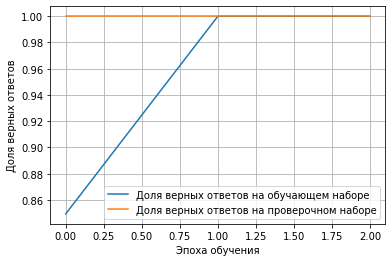

НЕЙРОНКА:  Embedding + Dense сеть

positives  распознано  100 % сеть считает, что это  positives ,  распознано ВЕРНО!
negatives  распознано  100 % сеть считает, что это  negatives ,  распознано ВЕРНО!

Средний процент распознавания  100 %

Время обработки: 8.95c


In [39]:
cur_time = time.time() # засекаем время

epochs = 100
nEmbedding = 20

input_layer = Input(shape=(xLen, ))
ED_1 = Embedding(maxWordsCount, nEmbedding, input_length = xLen)(input_layer)
#ED_2 = SpatialDropout1D(nDropout)(ED_1)
#ED_3 = BatchNormalization()(ED_2)  # лучше работает без этого слоя
ED_3 = Flatten()(ED_1)
ED_4 = Dense(len(trainText), activation='sigmoid')(ED_3)

modelED = Model(inputs=input_layer, outputs=ED_4)
modelED.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
# остановки обучения по условию 
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 2, verbose = 0,  restore_best_weights = True)

#Обучаем на xTrain
history = modelED.fit(xTrain, yTrain, epochs=epochs, verbose = 1,
                      callbacks = early_stopping,
                      validation_data = (xTest, yTest))


plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

#Проверяем результаты работы сети
pred = recognizeMultiClass(modelED, xTest2Classes, "Embedding + Dense сеть") #функция покажет какие классы и как распознаны верно

print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='') # смотрим время

# Выводы:
* Не хотел брать писателей и искал другую базу
* Основная забота - перенос данных из экслель-файла в txt
* Разобрался со стоп-словами, но база столь огромна, что не пришлось ни удалять стоп-слова, ни оставлять смайлики, окторые, я надеялся, могли бы помочь в распознавании тональности сообщения
----
для остального были заготовки с прошлых ДЗ
и было интересно упрощать и ускорять НС )